In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tabela = pd.read_csv('krkopt.data', header=None)
tabela.head()

,0,1,2,3,4,5,6
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [3]:
tabela.columns = ['bialy_kolumna', 'bialy_wiersz', 'wieza_kolumna', 'wieza_wiersz','czarny_kolumna', 'czarny_wiersz', 'ruchy_do_konca']
tabela.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bialy_kolumna   28056 non-null  object
 1   bialy_wiersz    28056 non-null  int64 
 2   wieza_kolumna   28056 non-null  object
 3   wieza_wiersz    28056 non-null  int64 
 4   czarny_kolumna  28056 non-null  object
 5   czarny_wiersz   28056 non-null  int64 
 6   ruchy_do_konca  28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [4]:
for col in tabela.columns:
    if( tabela[col].dtype == 'object' and col != 'ruchy_do_konca'):
        tabela[col] = tabela[col].astype('category').cat.codes 
        tabela[col] = tabela[col] +1
    


tabela.head()

,bialy_kolumna,bialy_wiersz,wieza_kolumna,wieza_wiersz,czarny_kolumna,czarny_wiersz,ruchy_do_konca
0,1,1,2,3,3,2,draw
1,1,1,3,1,3,2,draw
2,1,1,3,1,4,1,draw
3,1,1,3,1,4,2,draw
4,1,1,3,2,3,1,draw


In [5]:
tabela["dystans_euklides"] = np.sqrt((tabela["bialy_kolumna"] - tabela["czarny_kolumna"])**2 + (tabela["bialy_wiersz"] - tabela["czarny_wiersz"])**2)
tabela["dystans_manhattan"] = abs(tabela["bialy_kolumna"] - tabela["czarny_kolumna"]) + abs(tabela["bialy_wiersz"] - tabela["czarny_wiersz"])
tabela["dystans_chebyshev"] = np.maximum(abs(tabela["bialy_kolumna"] - tabela["czarny_kolumna"]), abs(tabela["bialy_wiersz"] - tabela["czarny_wiersz"]))
tabela["dystans_czarnego_od_krawedzi"] = np.minimum.reduce([tabela["czarny_kolumna"] - 1, 8 - tabela["czarny_kolumna"], tabela["czarny_wiersz"] - 1, 8 - tabela["czarny_wiersz"]])
tabela.head()

,bialy_kolumna,bialy_wiersz,wieza_kolumna,wieza_wiersz,czarny_kolumna,czarny_wiersz,ruchy_do_konca,dystans_euklides,dystans_manhattan,dystans_chebyshev,dystans_czarnego_od_krawedzi
0,1,1,2,3,3,2,draw,2.236068,3,2,1
1,1,1,3,1,3,2,draw,2.236068,3,2,1
2,1,1,3,1,4,1,draw,3.000000,3,3,0
3,1,1,3,1,4,2,draw,3.162278,4,3,1
4,1,1,3,2,3,1,draw,2.000000,2,2,0


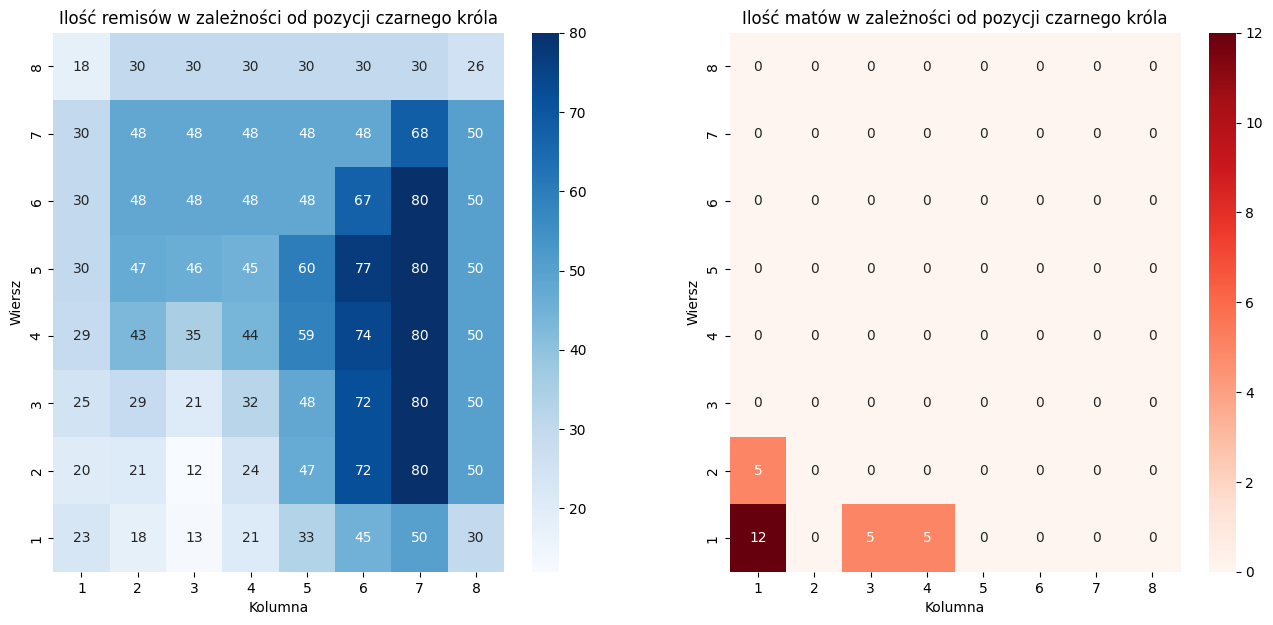

In [6]:
dane_remis = tabela[tabela['ruchy_do_konca'] == 'draw']
macierz_remis = pd.crosstab(dane_remis['czarny_wiersz'], dane_remis['czarny_kolumna'])
macierz_remis = macierz_remis.reindex(index=range(1, 9), columns=range(1, 9), fill_value=0)

dane_mat = tabela[tabela['ruchy_do_konca'] == 'zero']
macierz_mat = pd.crosstab(dane_mat['czarny_wiersz'], dane_mat['czarny_kolumna'])
macierz_mat = macierz_mat.reindex(index=range(1, 9), columns=range(1, 9), fill_value=0)

fig, ax = plt.subplots(1, 2, figsize=(16, 7))

sns.heatmap(
    macierz_remis, 
    annot=True, 
    fmt='d', 
    cmap='Blues',   
    ax=ax[0],            
)
ax[0].set_title('Ilość remisów w zależności od pozycji czarnego króla')
ax[0].set_xlabel('Kolumna')
ax[0].set_ylabel('Wiersz')
ax[0].invert_yaxis()

sns.heatmap(
    macierz_mat, 
    annot=True, 
    fmt='d', 
    cmap='Reds',  
    ax=ax[1]        
)
ax[1].set_title('Ilość matów w zależności od pozycji czarnego króla')
ax[1].set_xlabel('Kolumna')
ax[1].set_ylabel('Wiersz')
ax[1].invert_yaxis()

plt.show()

### Zadanie 1.
Dzięki powyższej wizualizacji możemy zauważyć, że w przypadku mata czarny król znajduję się w samym rogu planszy lub w niewielkiej odległości od niego ale ciągle na tej samej kolumnie lub wierszu co róg. Jako że ten zbiór danych pomija sytuacje symetryczne wydaje się że mat zachodzi tylko w lewym dolnym rogu planszy i że na polu na prawo od niego nigdy nie doszło do mata.

Sytuacja z remisami wygląda zupełnie inaczej, do remisów dochodzi najczęściej na wierszu lub kolumnie odległej o 1 od krawędzi planszy , jednocześnie w przeciwieństwie do matów nie ma pola na którym nie doszło by do remisu.

---

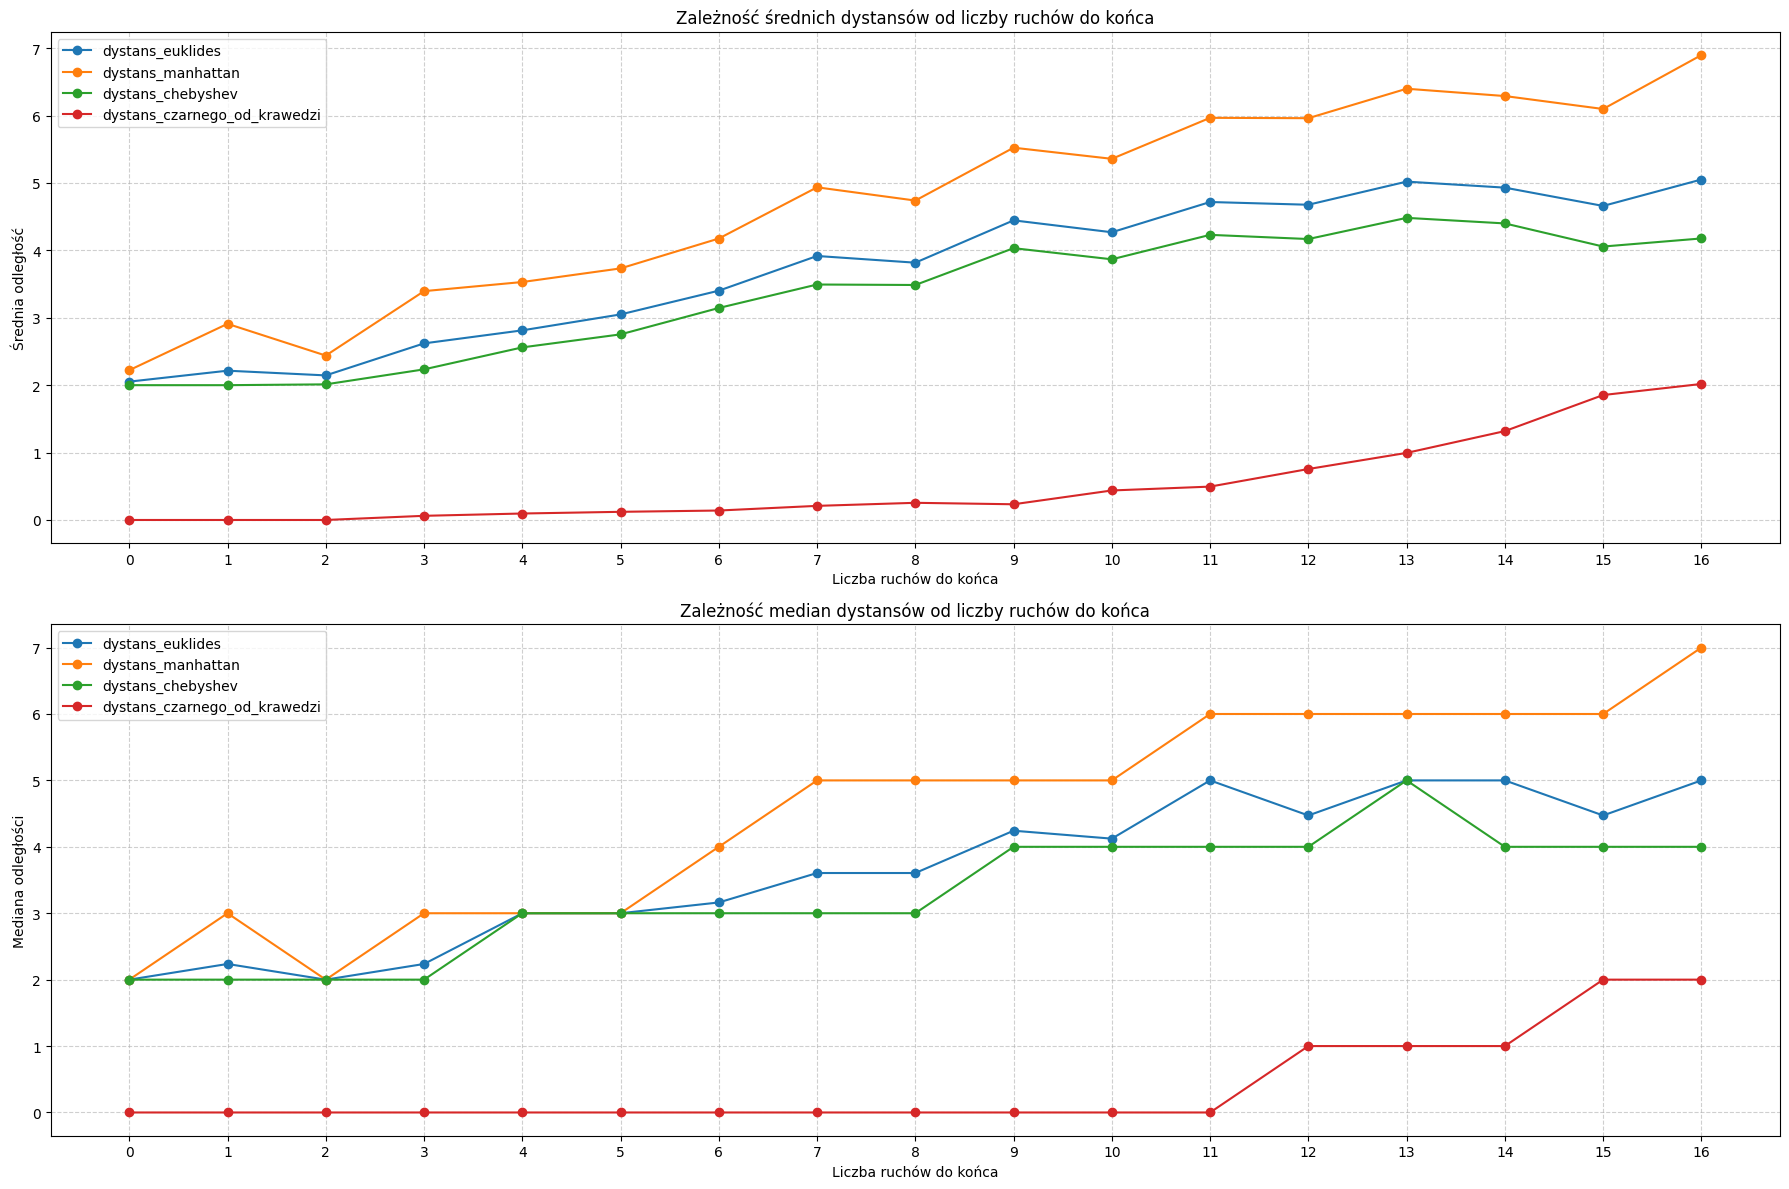

In [7]:
wyk2 = tabela[tabela['ruchy_do_konca'] != 'draw'].copy()

mapa_liczb = {
    'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 
    'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 
    'ten': 10, 'eleven': 11, 'twelve': 12, 'thirteen': 13, 
    'fourteen': 14, 'fifteen': 15, 'sixteen': 16
}
wyk2['ruchy_do_konca'] = wyk2['ruchy_do_konca'].map(mapa_liczb)


wyk2.sort_values(by='ruchy_do_konca', inplace=True)



wyk2median = wyk2.groupby(['ruchy_do_konca'],observed=True)[
    ['dystans_euklides', 'dystans_manhattan', 'dystans_chebyshev', 'dystans_czarnego_od_krawedzi']
].median()

wyk2 = wyk2.groupby(['ruchy_do_konca'],observed=True)[
    ['dystans_euklides', 'dystans_manhattan', 'dystans_chebyshev', 'dystans_czarnego_od_krawedzi']
].mean()



fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))

wyk2.plot(ax=axes[0], marker='o') 

axes[0].set_title('Zależność średnich dystansów od liczby ruchów do końca')
axes[0].set_ylabel('Średnia odległość')
axes[0].set_xlabel('Liczba ruchów do końca')
axes[0].grid(True, linestyle='--', alpha=0.6)

axes[0].set_xticks(range(0,17))
axes[0].set_xticklabels(wyk2.index)

wyk2median.plot(ax=axes[1], marker='o', linestyle='-') 

axes[1].set_title('Zależność median dystansów od liczby ruchów do końca')
axes[1].set_xlabel('Liczba ruchów do końca')
axes[1].set_ylabel('Mediana odległości')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_xticks(range(len(wyk2median.index)))
axes[1].set_xticklabels(wyk2median.index)

plt.tight_layout()

plt.show()

### Zadanie 2.
Można zauważyć, że zależności średniej różnych rodzajów odległości od liczby ruchów potrzebnych do zakończenia gry jest podobna i jest prawie monotonicznie rosnąca.

Uważam że dystans chebysheva jest najlepszy ze względu na to że nawet jeśli liczba ruchów do końca gry rośnie a średnia dystansu maleje to ilość o którą maleje jest najmniejsza od pozostałych dystansów, więc trudniej bedzię pomylić z mała liczbe ruchów do końca z duża. Jednak klasyfikacja na podstawie samego dystansu może być trudna bo dla dużych zakresów ruchów do końca mediana dystansu jest taka sama. W przypadku miediany wyróżnia się dystans euklidesowy chociaż ciągle główny trend jest rosnący to nie jest ściśle rosnący.

---



### Zadanie 3.
Z wykresu średniej dystansu od ilości ruchów do końca gry widać wyraźną zależność odległości czarnego króla od krawędzi z ilością ruchów do końca gry. 
Jeśli za to spojrzymy na wykres median dystansów do liczby ruchów do końca gry , możemy zauważych że łącząc ze sobą informacje o dystansie euklidesowym pomiędzy królami i odległością czarnego króla od krawędzi, powinniśmy być wstanie w większości przypadków określić ile ruchów potrzeba do końca gry.